## 📊 Exploratory Data Analysis (EDA)

In this section, we perform a basic exploratory analysis of the generated `sales_data.csv` file to:

- Understand the structure and volume of the dataset
- Inspect distribution of sales quantities
- Verify the number of unique products and dates
- Ensure data consistency before modeling or visualization


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('../data/sales_data.csv')
df.head()

,item_id,item_name,category,date,sales_qty,month,is_holiday
0,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-01,11,1,True
1,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-02,25,1,False
2,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-03,37,1,False
3,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-04,60,1,False
4,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-05,82,1,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475150 entries, 0 to 475149
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   item_id     475150 non-null  int64 
 1   item_name   475150 non-null  object
 2   category    475150 non-null  object
 3   date        475150 non-null  object
 4   sales_qty   475150 non-null  int64 
 5   month       475150 non-null  int64 
 6   is_holiday  475150 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 22.2+ MB


In [9]:
df['date']=pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475150 entries, 0 to 475149
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   item_id     475150 non-null  int64         
 1   item_name   475150 non-null  object        
 2   category    475150 non-null  object        
 3   date        475150 non-null  datetime64[ns]
 4   sales_qty   475150 non-null  int64         
 5   month       475150 non-null  int64         
 6   is_holiday  475150 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(2)
memory usage: 22.2+ MB


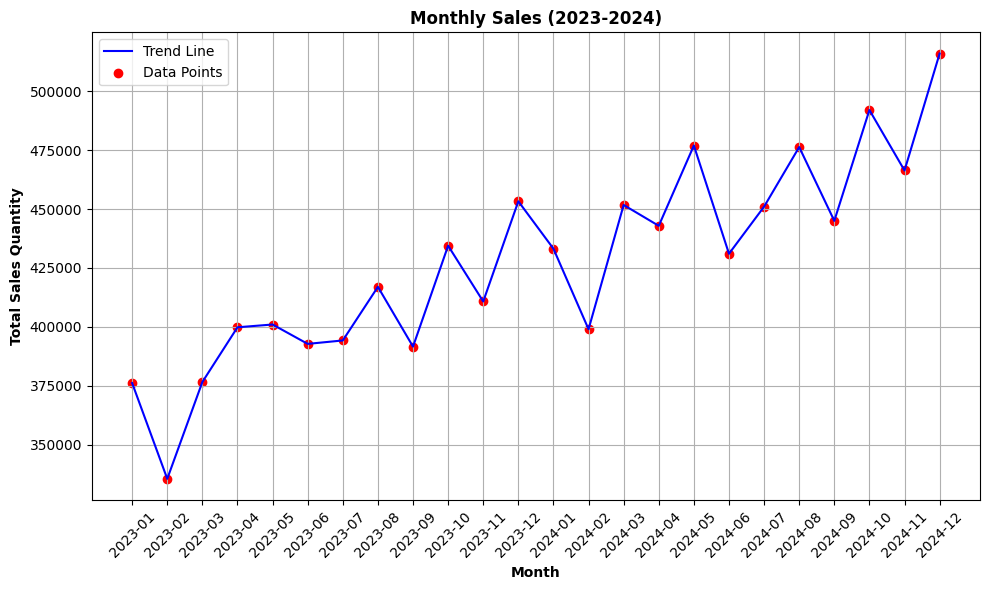

In [11]:
# df['month_period'] = df['date'].dt.to_period('M').dt.to_timestamp()

monthly_sales = df.groupby(df['date'].dt.to_period('M'))['sales_qty'].sum()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, c='blue', label='Trend Line')
plt.scatter(monthly_sales.index.astype(str), monthly_sales.values, c='red', label='Data Points')
plt.xlabel('Month', weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Sales Quantity', weight='bold')
plt.title('Monthly Sales (2023-2024)', weight='bold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

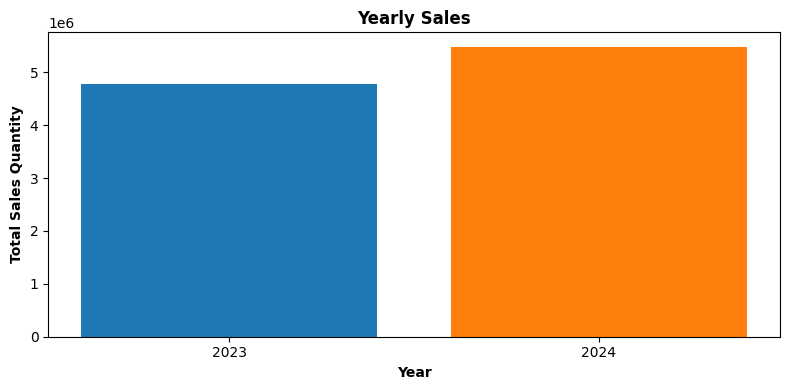

In [12]:
year_sales = df.groupby(df['date'].dt.to_period('Y'))['sales_qty'].sum()

plt.figure(figsize=(8,4))
plt.bar(year_sales.index.astype('str'), year_sales.values, color=plt.get_cmap('tab10').colors[:len(year_sales)])
plt.xlabel('Year', weight='bold')
plt.ylabel('Total Sales Quantity', weight='bold')
plt.title('Yearly Sales', weight='bold')
# plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [13]:
df['month'] = df['date'].dt.to_period('M') 

In [14]:
monthly_sales_by_category = df.groupby(['category', 'month'])['sales_qty'].sum().reset_index()
monthly_sales_by_category.head()

,category,month,sales_qty
0,Іграшки,2023-01,30749
1,Іграшки,2023-02,27226
2,Іграшки,2023-03,30045
3,Іграшки,2023-04,32698
4,Іграшки,2023-05,32445


Text(0, 0.5, 'Sales Quantity')

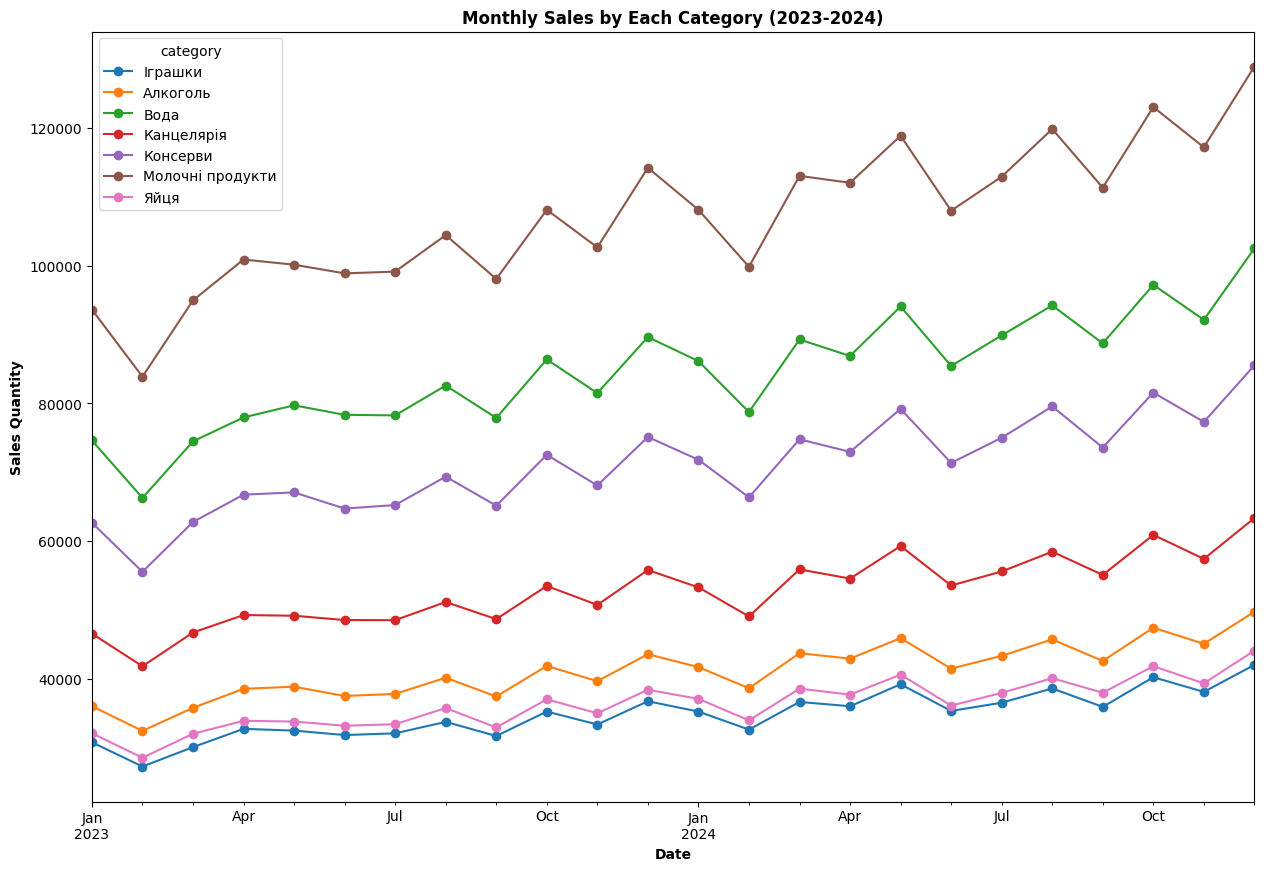

In [15]:
pivot_df= monthly_sales_by_category.pivot(index='month', columns='category', values='sales_qty')
pivot_df.index= pivot_df.index.to_timestamp()

pivot_df.plot(figsize=(15,10), marker='o')
plt.title('Monthly Sales by Each Category (2023-2024)', weight='bold')
plt.xlabel('Date', weight='bold')
plt.ylabel('Sales Quantity', weight='bold')

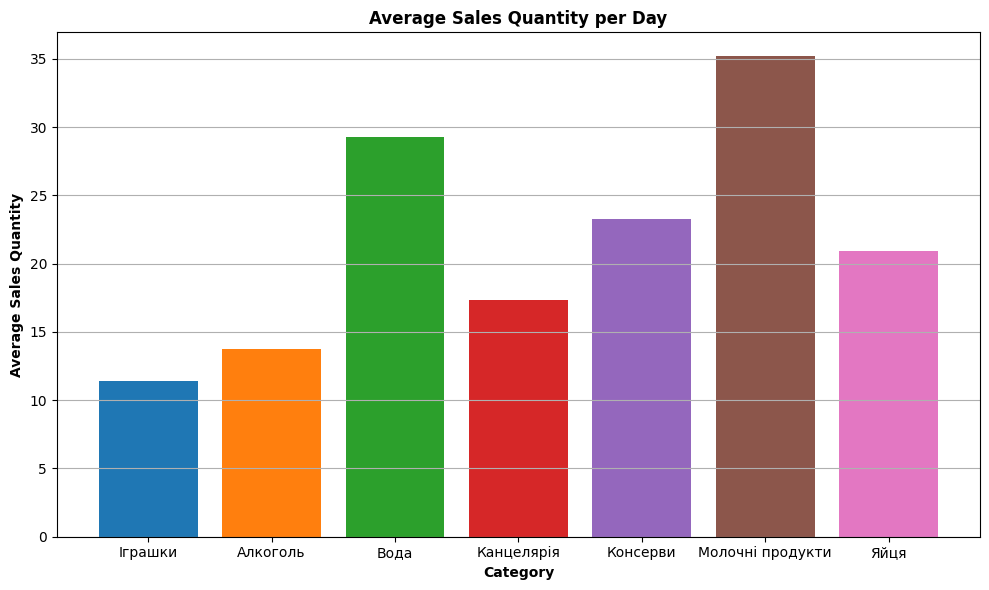

In [16]:
mean_quantity_per_day = df.groupby('category')['sales_qty'].mean()

plt.figure(figsize=(10,6))
plt.bar(mean_quantity_per_day.index, mean_quantity_per_day.values, color=plt.get_cmap('tab10').colors[:len(mean_quantity_per_day)])
plt.title('Average Sales Quantity per Day', weight='bold')
plt.xlabel('Category', weight='bold')
plt.ylabel('Average Sales Quantity', weight='bold')
plt.grid(axis='y')
plt.tight_layout()

Text(0.5, 1.0, 'Sales Quantity per Category')

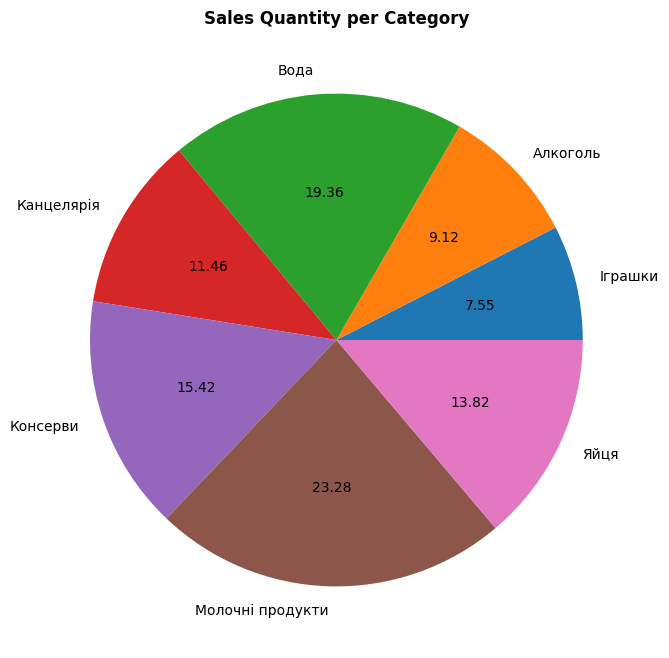

In [17]:
plt.figure(figsize=(8,8))
plt.pie(mean_quantity_per_day.values, labels=mean_quantity_per_day.index, autopct='%1.2f')
plt.title('Sales Quantity per Category', weight='bold')

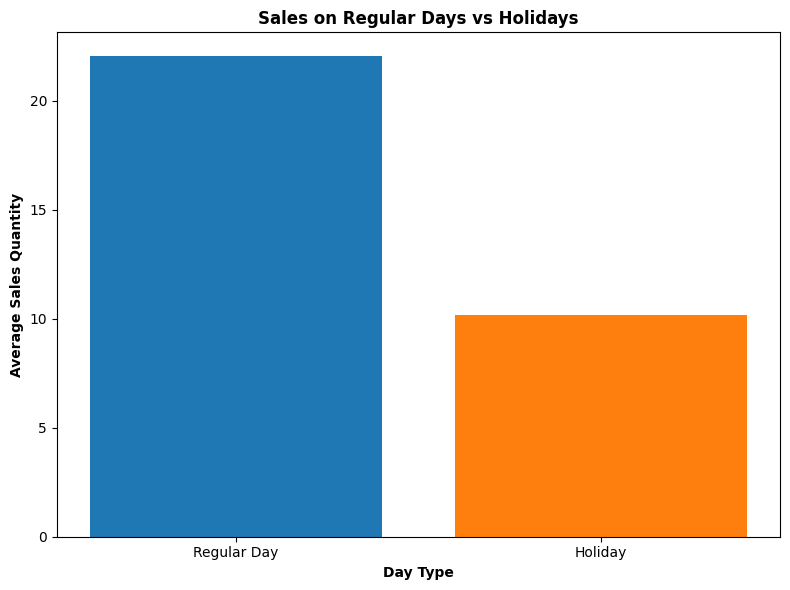

In [18]:
mean_quantity_holiday = df.groupby('is_holiday')['sales_qty'].mean()

plt.figure(figsize=(8,6))
plt.bar([0,1], mean_quantity_holiday.values, color=plt.get_cmap('tab10').colors[:2])
plt.xticks([0, 1], ['Regular Day', 'Holiday'])

plt.xlabel('Day Type', weight='bold')
plt.ylabel('Average Sales Quantity', weight='bold')
plt.title('Sales on Regular Days vs Holidays', weight='bold')
plt.tight_layout()


In [19]:
mean_quantity_holiday.index

Index([False, True], dtype='bool', name='is_holiday')

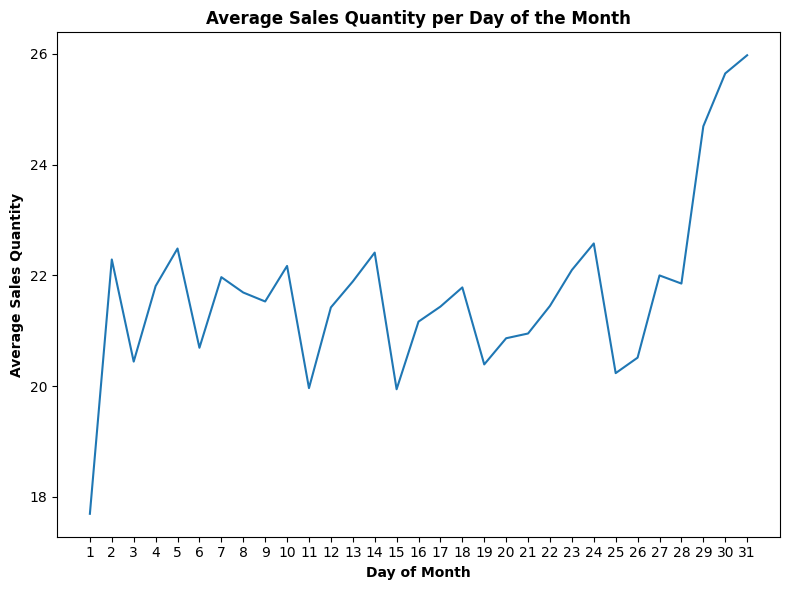

In [20]:
mean_day_sales = df.groupby(df['date'].dt.day)['sales_qty'].mean()

plt.figure(figsize=(8,6))

plt.plot(mean_day_sales.index.astype(str), mean_day_sales.values)
plt.title('Average Sales Quantity per Day of the Month', weight='bold')
plt.xlabel('Day of Month', weight='bold')
plt.ylabel('Average Sales Quantity', weight='bold')
plt.tight_layout()

In [21]:
df.head()

,item_id,item_name,category,date,sales_qty,month,is_holiday
0,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-01,11,2023-01,True
1,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-02,25,2023-01,False
2,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-03,37,2023-01,False
3,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-04,60,2023-01,False
4,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-05,82,2023-01,False
